# Sort images into correct categories

follows the `cat-dog.py` file

In [2]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
import os

base_dir = '../../archive/catsdogssmall'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 64s 641ms/step - loss: 0.6956 - acc: 0.5235 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 63s 625ms/step - loss: 0.6893 - acc: 0.5400 - val_loss: 0.6774 - val_acc: 0.6020
Epoch 3/10
100/100 [==============================] - 62s 618ms/step - loss: 0.6811 - acc: 0.5625 - val_loss: 0.6850 - val_acc: 0.5290
Epoch 4/10
100/100 [==============================] - 62s 621ms/step - loss: 0.6738 - acc: 0.5720 - val_loss: 0.6585 - val_acc: 0.6040
Epoch 5/10
100/100 [==============================] - 62s 624ms/step - loss: 0.6542 - acc: 0.6205 - val_loss: 0.6504 - val_acc: 0.6000
Epoch 6/10
100/100 [==============================] - 520s 5s/step - loss: 0.6471 - acc: 0.6185 - val_loss: 0.6309 - val_acc: 0.6170
Epoch 7/10
100/100 [==============================] - 61s 614ms/step - loss: 0.6353 - acc: 0.6230 - val_loss: 0.6118 - val_acc: 0.6770
Epoch 8/10
100/100 [==============================] - 61s

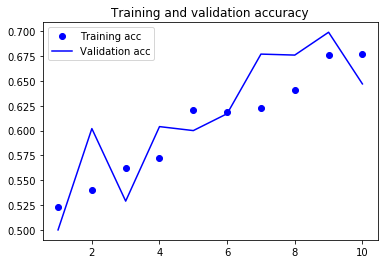

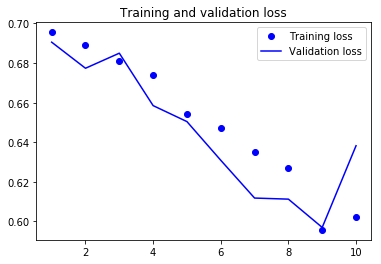

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()